# Markov Decision Processes-Forest management

In [1]:
import gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import random
import pandas as pd
import hiive.mdptoolbox.mdp as mdp
import hiive.mdptoolbox.example as mdp_example
from collections import defaultdict
import itertools 

### Value iteration

Text(0.5, 1.03, 'Forest management-2000 states Value iteration')

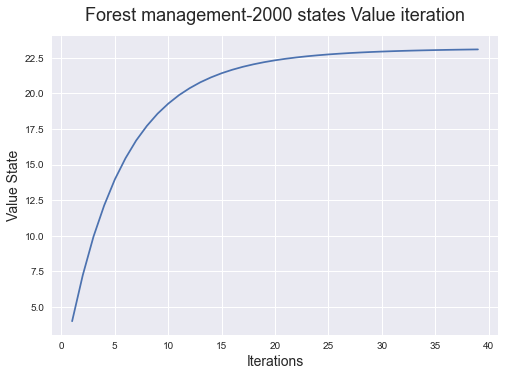

In [2]:
v_time = 0
start = time.time()
P, R = mdp_example.forest(S=2000)
vi = mdp.ValueIteration(P, R, gamma=0.9,run_stat_frequency=1)
#vi.setVerbose()
vi.setSilent()
#vi.verbose
vi.run()
v_stats = vi.run_stats

end = time.time()
v_time = end - start
v_reward = []
v_iter = []
for iter in v_stats:
    v_iter.append(iter['Iteration'])
    v_reward.append(iter['Reward'])

plt.style.use('seaborn')
plt.plot(v_iter, v_reward)
plt.ylabel('Value State', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
#plt.ylim(0.0,7)
plt.title('Forest management-2000 states Value iteration', fontsize = 18, y = 1.03)

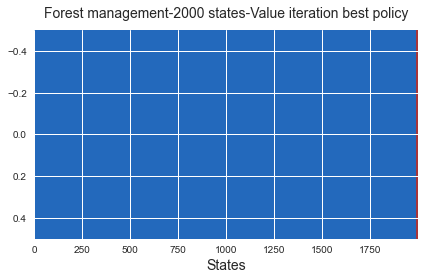

In [3]:
P, R = mdp_example.forest(S=2000)
vi = mdp.ValueIteration(P, R, gamma=0.9,run_stat_frequency=1)
#vi = mdp.ValueIteration(P, R, gamma=0.9999,run_stat_frequency=1)
vi.run()
v_policy = vi.policy
#v_v = vi.V

fig, ax = plt.subplots(figsize=(6,4))
ax.imshow(np.atleast_2d(v_policy), interpolation='nearest',aspect='auto',cmap='vlag_r')
plt.title('Forest management-2000 states-Value iteration best policy',fontsize = 14, y = 1.03)
#plt.ylabel('Value State', fontsize = 14)
plt.xlabel('States', fontsize = 14)
fig.tight_layout()

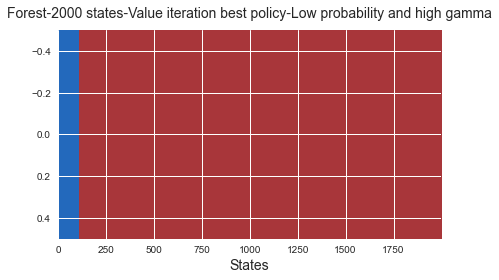

In [4]:
P, R = mdp_example.forest(S=2000,p=0.001)
vi = mdp.ValueIteration(P, R, gamma=0.9999,run_stat_frequency=1)
vi.run()
v_policy2 = vi.policy
#v_v = vi.V

fig, ax = plt.subplots(figsize=(6,4))
ax.imshow(np.atleast_2d(v_policy2), interpolation='nearest',aspect='auto',cmap='vlag_r')
plt.title('Forest-2000 states-Value iteration best policy-Low probability and high gamma',fontsize = 14, y = 1.03)
plt.xlabel('States', fontsize = 14)
fig.tight_layout()

### Policy iteration

Text(0.5, 1.03, 'Forest management-2000 states Policy iteration')

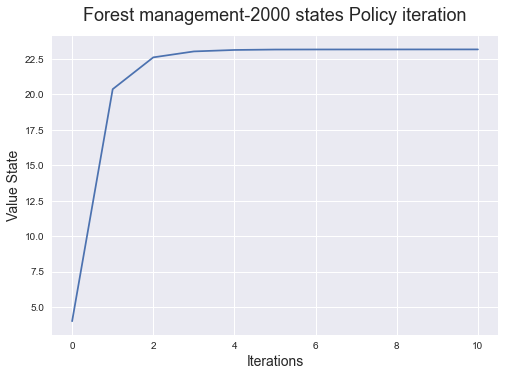

In [5]:
p_time = 0
start = time.time()
P, R = mdp_example.forest(S=2000)
pi = mdp.PolicyIterationModified(P, R, gamma=0.90)
#pi.setVerbose()
pi.setSilent()
#vi.verbose
#customized mpd.py to return rewards from PolicyIterationModified method
rewards = pi.run()

end = time.time()
p_time = end - start 
plt.style.use('seaborn')
plt.plot(range(len(rewards)), rewards)
plt.ylabel('Value State', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
#plt.ylim(0.0,7)
plt.title('Forest management-2000 states Policy iteration', fontsize = 18, y = 1.03)

### Q-learning

Text(0.5, 1.03, 'Forest management-2000 states Q learning')

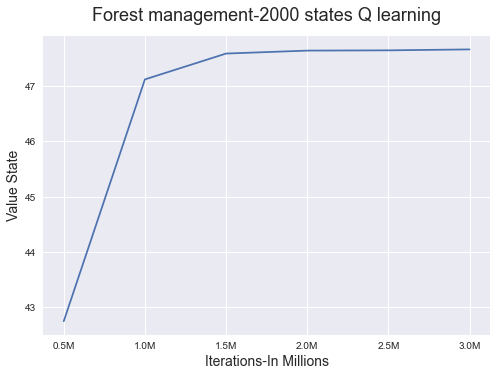

In [6]:
ql_time = 0
start = time.time()
P, R = mdp_example.forest(S=2000)
#ql = mdp.QLearning(P,R,gamma = 0.50)
ql = mdp.QLearning(P,R,gamma = 0.99,n_iter=3000000,run_stat_frequency=500000)
#vi.setVerbose()
ql.setSilent()
#vi.verbose
ql.run()
ql_stats = ql.run_stats

end = time.time()

ql_time = end - start
ql_reward = []
ql_iter = []
for iter in ql_stats:
    ql_iter.append(iter['Iteration'])
    ql_reward.append(iter['Max V'])

ql_iter = [str(x/1000000) + 'M' for x in ql_iter]

plt.style.use('seaborn')
#plt.plot(ql_iter, np.cumsum(ql_reward))
plt.plot(ql_iter, ql_reward)
plt.ylabel('Value State', fontsize = 14)
plt.xlabel('Iterations-In Millions', fontsize = 14)
#plt.ylim(0.0,7)
plt.title('Forest management-2000 states Q learning', fontsize = 18, y = 1.03)

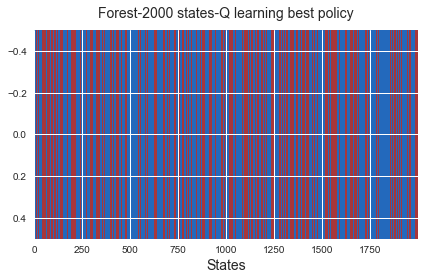

In [7]:
fig, ax = plt.subplots(figsize=(6,4))
ax.imshow(np.atleast_2d(ql.policy), interpolation='nearest',aspect='auto',cmap='vlag_r')
plt.title('Forest-2000 states-Q learning best policy',fontsize = 14, y = 1.03)
plt.xlabel('States', fontsize = 14)
fig.tight_layout()

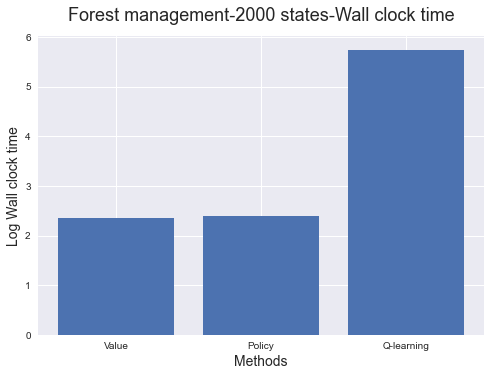

In [8]:
#wall clock
plt.bar(['Value','Policy','Q-learning',],[np.log(v_time+10),np.log(p_time+10),np.log(ql_time+10)])
plt.ylabel('Log Wall clock time', fontsize = 14)
plt.xlabel('Methods', fontsize = 14)
plt.title('Forest management-2000 states-Wall clock time', fontsize = 18, y = 1.03)
#plt.ylim(0.5,0.79)
plt.show()

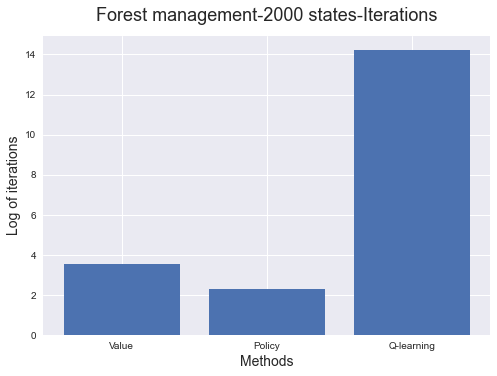

In [9]:
#no of iterations
plt.bar(['Value','Policy','Q-learning',],[np.log(35),np.log(10),np.log(1500000)])
plt.ylabel('Log of iterations', fontsize = 14)
plt.xlabel('Methods', fontsize = 14)
plt.title('Forest management-2000 states-Iterations', fontsize = 18, y = 1.03)
#plt.ylim(0.5,0.79)
plt.show()